In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

# Linear Dataset

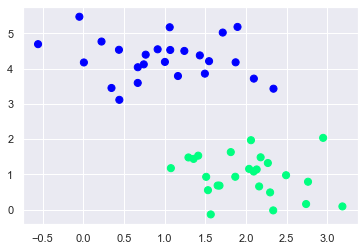

In [6]:
from sklearn.datasets import make_blobs
x,y = make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.60)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='winter')

In [8]:
from sklearn.svm import SVC # support vector classifier
model = SVC(kernel='linear',C=1)
model.fit(x,y)

SVC(C=1, kernel='linear')

In [9]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

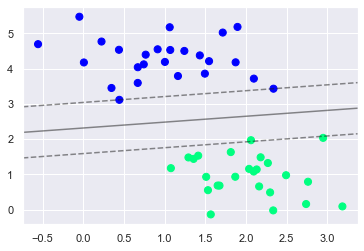

In [11]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model);

In [26]:
model = SVC(kernel='linear',C=0.1)
model.fit(x,y)

SVC(C=0.1, kernel='linear')

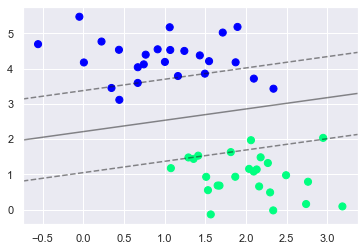

In [27]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model);

# Kernal Trick In SVM

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

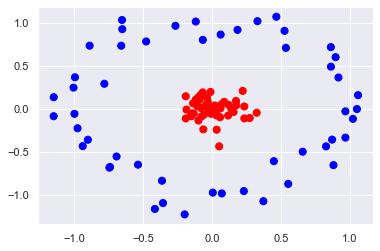

In [31]:
from sklearn.datasets import make_circles
x,y = make_circles(100,factor=0.1,noise=0.1)
plt.scatter(x[:,0],x[:,1],c=y,cmap='bwr',s=50)

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [33]:
classifier = SVC(kernel='linear')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("accuracy = ",accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

accuracy =  0.25


array([[ 0, 15],
       [ 0,  5]], dtype=int64)

In [36]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


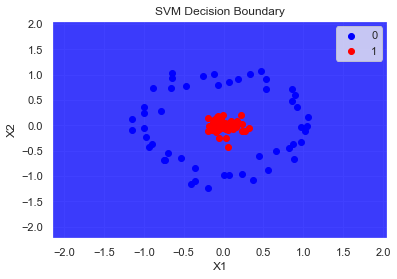

In [37]:
plot_decision_boundary(x, y, classifier)

In [38]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3DSubplot:xlabel='X1', ylabel='X2'>

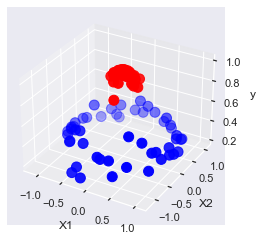

In [39]:
plot_3d_plot(x,y)

# Using RBF 

In [40]:
rbf_classifier = SVC(kernel='rbf')
rbf_classifier.fit(x_train,y_train)
y_pred = rbf_classifier.predict(x_test)

In [41]:
print("accuracy = ",accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

accuracy =  1.0


array([[15,  0],
       [ 0,  5]], dtype=int64)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


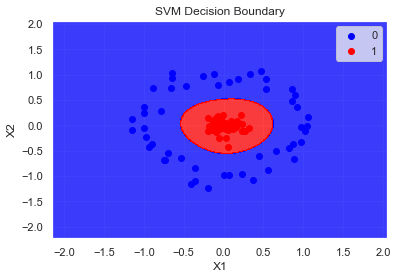

In [43]:
plot_decision_boundary(x, y, rbf_classifier)

# Using poly with degree 3

In [45]:
poly_classifier = SVC(kernel='poly') # default degree is 3
poly_classifier.fit(x_train,y_train)
y_pred = poly_classifier.predict(x_test)

In [46]:
print("accuracy = ",accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

accuracy =  0.45


array([[ 4, 11],
       [ 0,  5]], dtype=int64)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


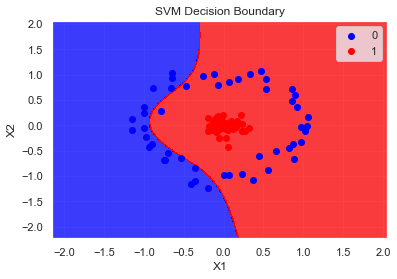

In [47]:
plot_decision_boundary(x, y, poly_classifier)

# Using poly with degree 2 

In [48]:
poly_classifier = SVC(kernel='poly',degree=2) # default degree is 3
poly_classifier.fit(x_train,y_train)
y_pred = poly_classifier.predict(x_test)

In [49]:
print("accuracy = ",accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

accuracy =  1.0


array([[15,  0],
       [ 0,  5]], dtype=int64)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


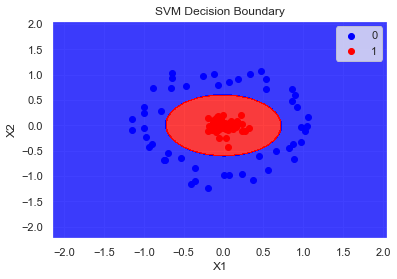

In [50]:
plot_decision_boundary(x, y, poly_classifier)